In [22]:
#Importing Necessary Libraries
!pip install tensorflow
!pip install xgboost

In [24]:
#Importing Necessary Libraries

import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore") 

%matplotlib inline

In [25]:
#Importing the dataset
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data = pd.read_csv(r"C:\Users\Lenovo\Documents\My_Projects\ML Projects\Skyserver_SQL2_27_2018 6_51_39 PM.csv")
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [26]:
data.shape

(10000, 18)

In [27]:
data.drop(['objid','specobjid'], axis=1, inplace=True)

In [28]:
data.shape

(10000, 16)

In [29]:
data.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,5.353854,8410.000000,57481.000000,1000.000000


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   rerun     10000 non-null  int64  
 9   camcol    10000 non-null  int64  
 10  field     10000 non-null  int64  
 11  class     10000 non-null  object 
 12  redshift  10000 non-null  float64
 13  plate     10000 non-null  int64  
 14  mjd       10000 non-null  int64  
 15  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(7), object(1)
memory usage: 1.2+ MB


In [77]:
le = LabelEncoder().fit(data['class'])
data['class'] = le.transform(data['class'])

data.head(10)

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,2,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,2,0.000590,3306,54922,512
5,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,2,0.000315,324,51666,594
6,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,0,0.100242,287,52023,559
7,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,2,0.000315,3306,54922,515
8,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,2,0.000089,323,51615,595
9,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,0,0.040508,288,52000,400


In [32]:
X = data.drop('class', axis=1)
y = data['class']

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True , with_mean= True , with_std = True)
X= scaler.fit_transform(X)
X[:20]

array([[ 0.16745842, -0.58492272,  1.03148637, -0.34855938, -0.83728027,
        -0.94605772, -0.99534154, -0.83806089,  0.        ,  0.21085172,
        -0.21763043, -0.36973112,  1.03148936,  1.30931064,  0.66863177],
       [ 0.16886159, -0.58311429,  0.05243046, -0.16653251, -0.15415531,
        -0.08264457, -0.02604308, -0.83806089,  0.        ,  0.21085172,
        -0.21763043, -0.36984929, -0.63621258, -0.87919741,  0.91101156],
       [ 0.17057433, -0.58347525,  0.92156796,  0.86709322,  0.59315368,
         0.44120145,  0.31452753, -0.83806089,  0.        ,  0.21085172,
        -0.21147922, -0.05302706, -0.65633905, -0.60919097,  0.77527888],
       [ 0.17455754, -0.58650069, -1.03063038, -0.81362749, -0.63669227,
        -0.52660429, -0.43092107, -0.83806089,  0.        ,  0.21085172,
        -0.20532801, -0.36999261,  1.03148936,  1.30931064,  0.76073609],
       [ 0.17482457, -0.58441247, -1.29023238, -1.17251944, -0.37676237,
        -0.02510121,  0.15827647, -0.83806089, 

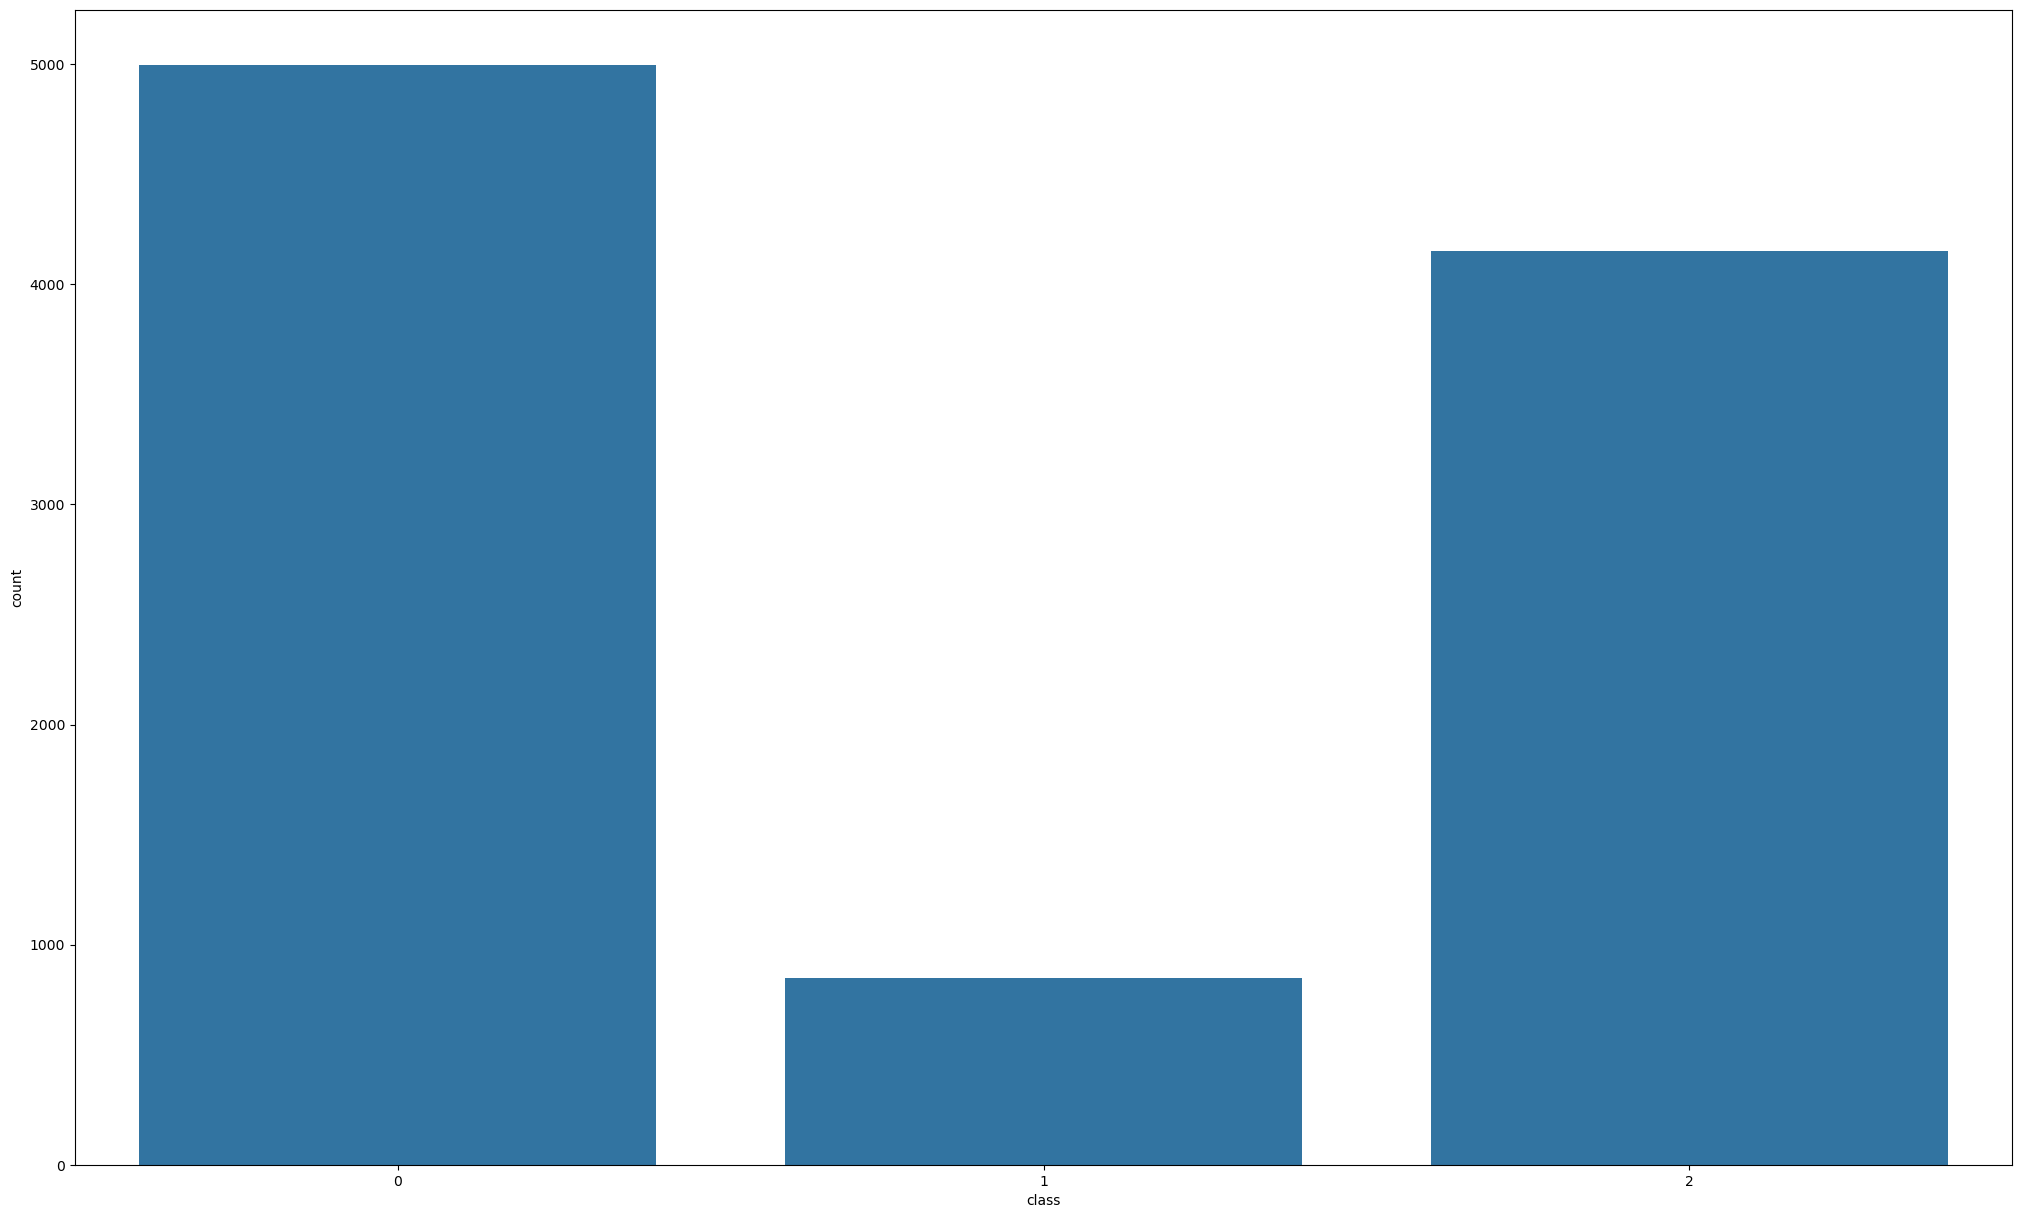

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=128)
sns.countplot(x=data['class'])
plt.show()

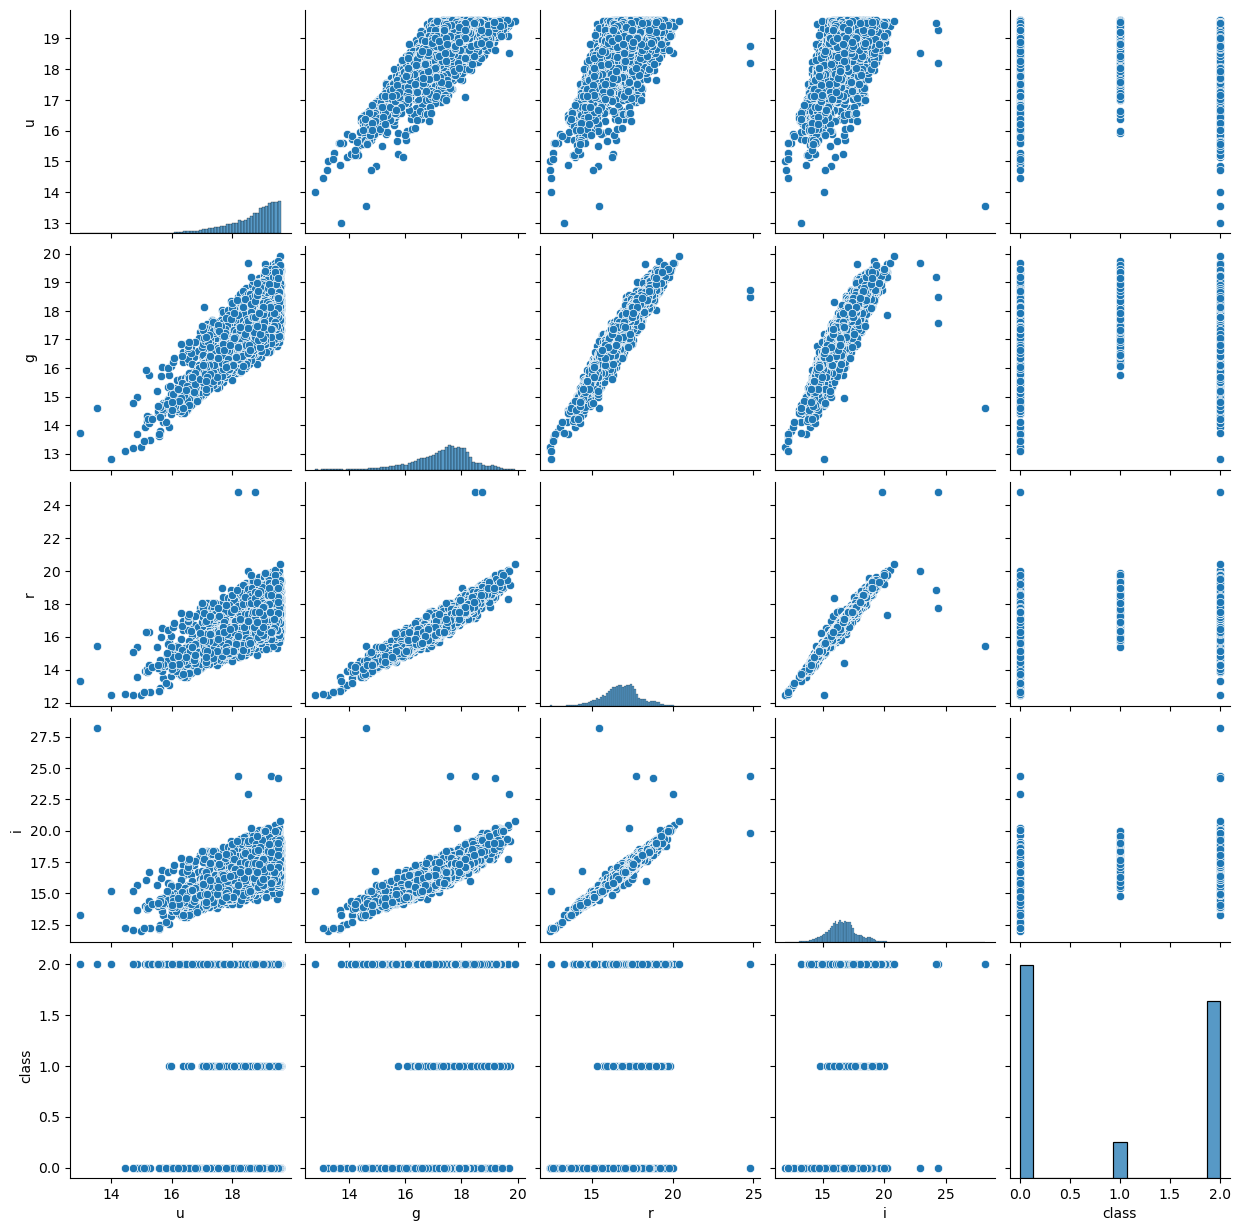

In [35]:
sns.pairplot(data[['u','g','r','i','class']])
plt.show()

In [48]:
dtClassifer = DecisionTreeClassifier(max_leaf_nodes=15,max_depth=3)
LRClassifer = LogisticRegression()
NeNeClassifier = KNeighborsClassifier(n_neighbors=3)

model = RandomForestClassifier(n_estimators=100, random_state=128)
model.fit(X_train, y_train) 

RandomForestClassifier(random_state=128)

In [37]:
dtClassifer.fit(X_train, y_train)

LRClassifer.fit(X_train, y_train)

NeNeClassifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
y_preds = dtClassifer.predict(X_test)
y_predsLR = LRClassifer.predict(X_test)
y_predsNeNe = NeNeClassifier.predict(X_test)

In [39]:
print(y_preds[:10],'\n',y_test[:10])

print("\n*******************************************************")
print(y_predsLR[:10],'\n',y_test[:10])

print("\n*******************************************************")
print(y_predsNeNe[:10],'\n',y_test[:10])

[2 0 2 2 0 0 2 1 0 0] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: int32

*******************************************************
[2 0 2 2 0 0 2 1 0 0] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: int32

*******************************************************
[2 0 2 2 0 0 2 1 0 0] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: int32


In [40]:
#Classification Report

from sklearn.metrics import classification_report
target_names = ['0', '1', '2']

print('\033[1m  Decision Tree -\n  \033[0m',classification_report(y_preds,y_test,target_names=target_names) + '\n')
print('\033[1m  Linear Regression -\n  \033[0m',classification_report(y_predsLR,y_test,target_names=target_names) + '\n')
print("\033[1m  KNN Classifier -\n  \033[0m",classification_report(y_predsNeNe,y_test,target_names=target_names) + '\n')

  Decision Tree -
                 precision    recall  f1-score   support

           0       0.99      0.99      0.99      1504
           1       0.94      0.98      0.96       255
           2       1.00      1.00      1.00      1241

    accuracy                           0.99      3000
   macro avg       0.98      0.99      0.98      3000
weighted avg       0.99      0.99      0.99      3000


  Linear Regression -
                 precision    recall  f1-score   support

           0       0.97      0.99      0.98      1469
           1       0.94      0.97      0.96       258
           2       0.99      0.96      0.98      1273

    accuracy                           0.98      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000


  KNN Classifier -
                 precision    recall  f1-score   support

           0       0.94      0.89      0.91      1575
           1       0.88      0.97      0.92       240
     

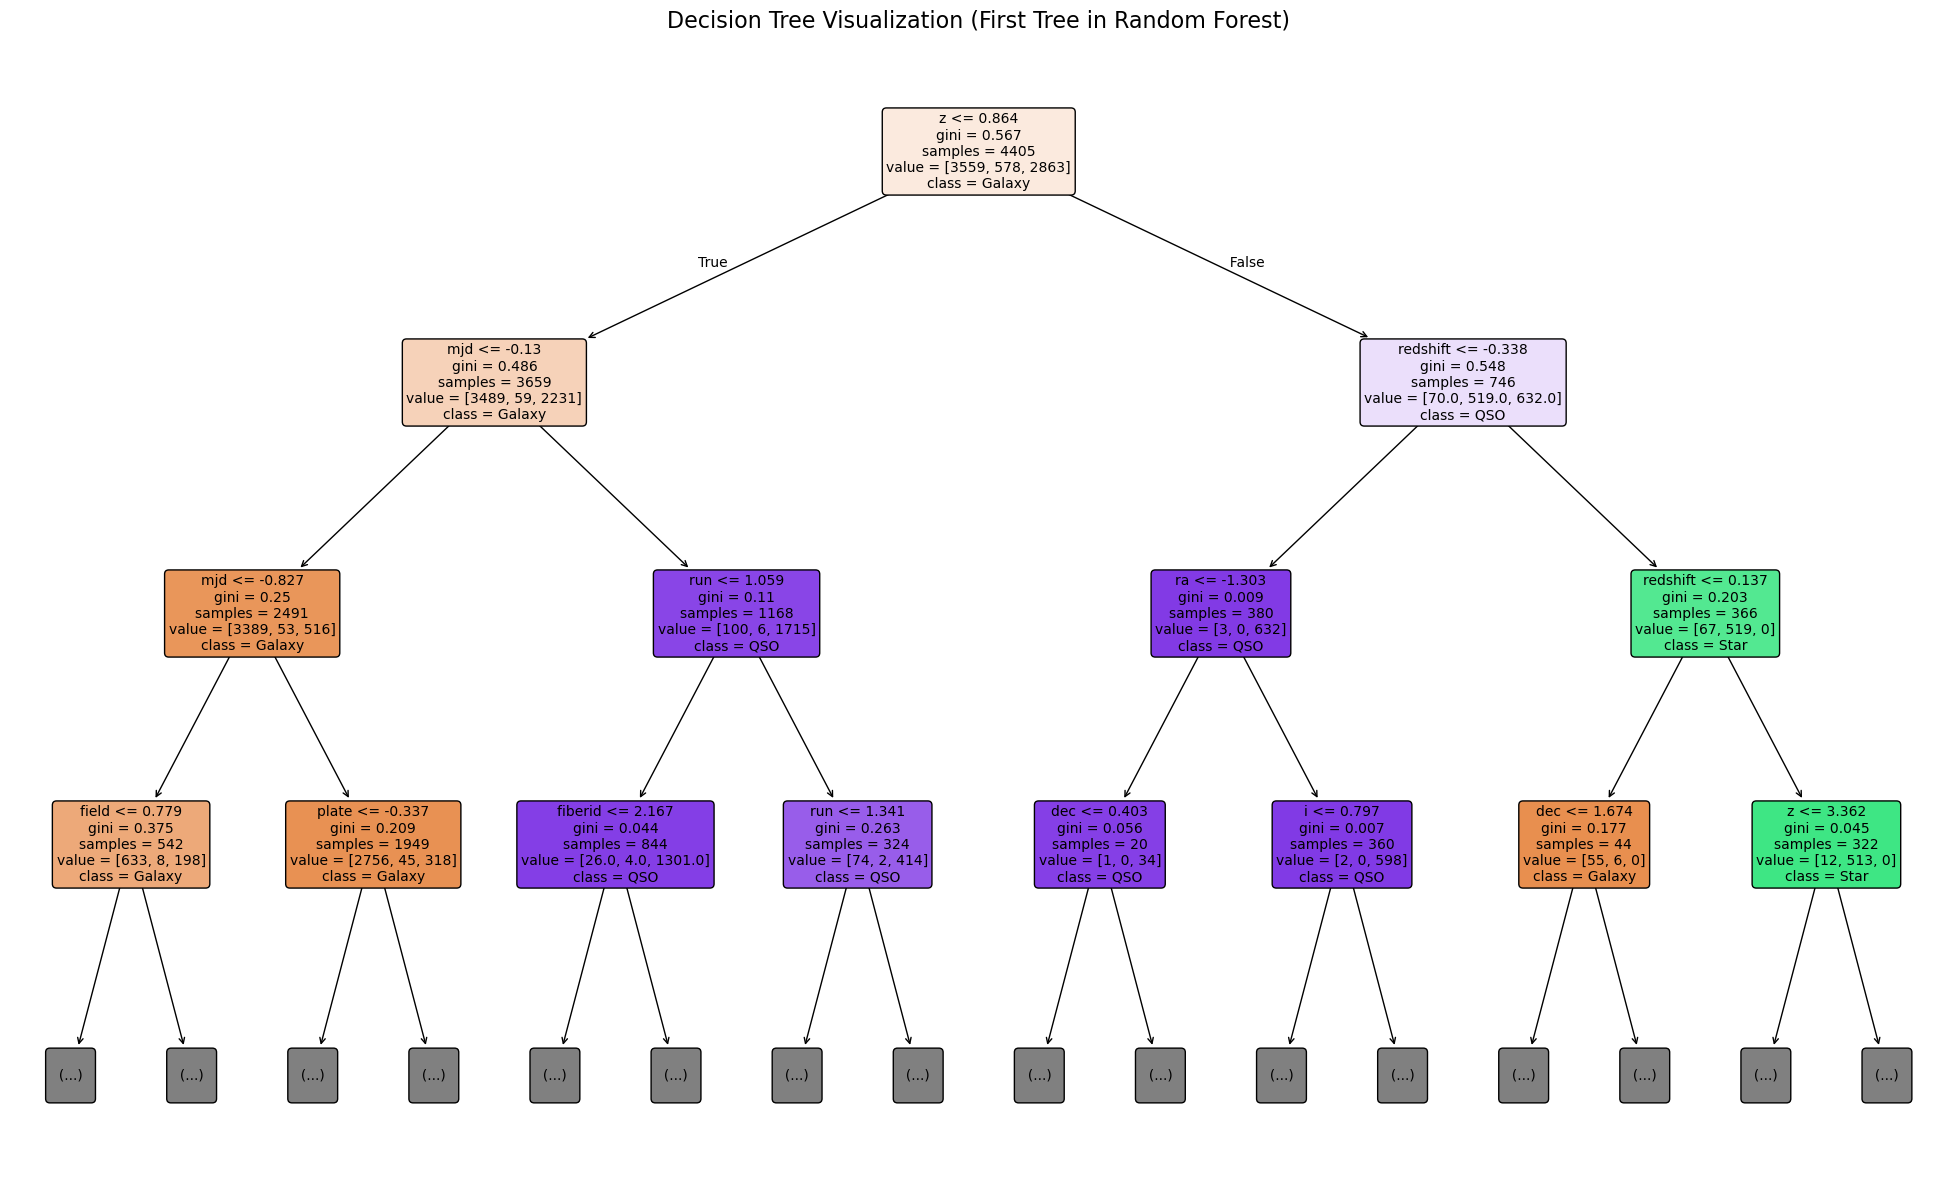

In [60]:
X = data.drop('class', axis=1)
feature_names = X.columns.tolist() 
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X) 

plt.figure(figsize=(25, 15))
plot_tree(model.estimators_[0],
          feature_names=feature_names,
          class_names=['Galaxy', 'Star', 'QSO'],
          filled=True,
          max_depth=3,
          impurity=True,
          proportion=False,
          rounded=True,
          label='all',
          fontsize=10
         )
plt.title("Decision Tree Visualization (First Tree in Random Forest)", fontsize=16)
plt.show()

<Figure size 2500x1500 with 0 Axes>

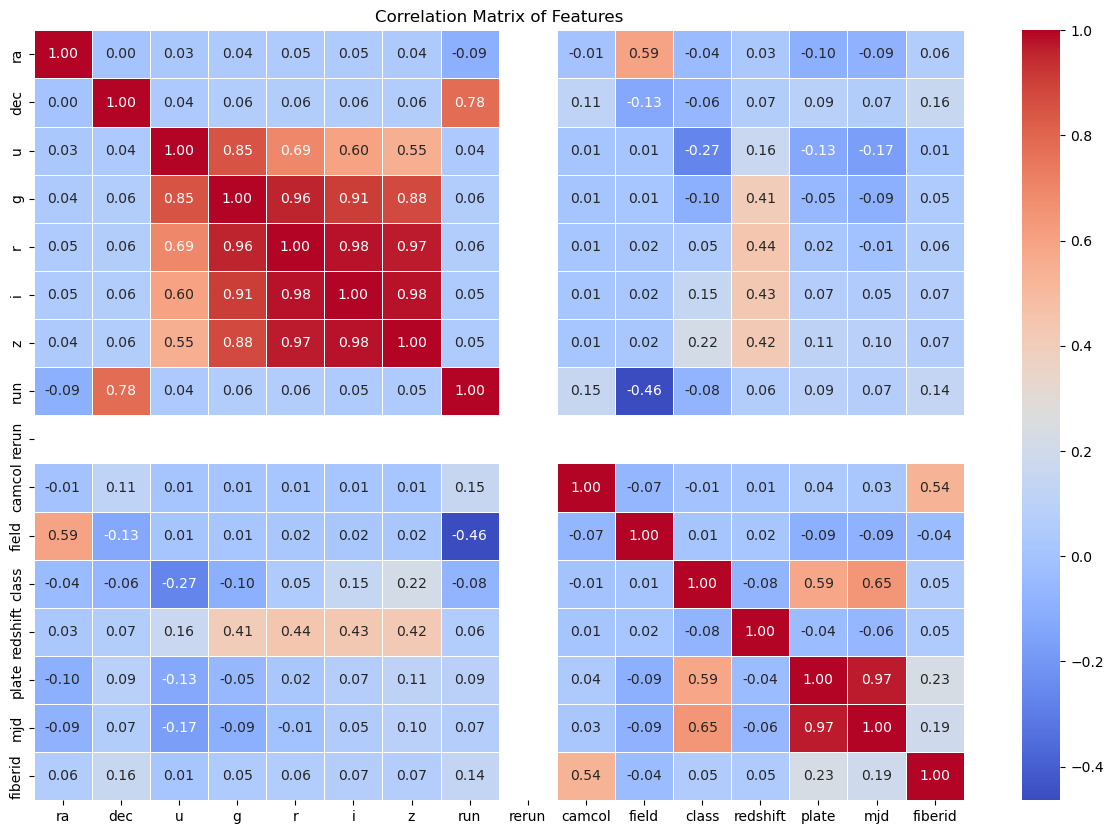

In [42]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [66]:
def classify_object(model, ra, dec, u, g, r, i, z, run, rerun, camcol, field, redshift, plate, mjd, fiberid):
    
    input_data = np.array([[ra, dec, u, g, r, i, z, run, rerun, camcol, field, redshift, plate, mjd, fiberid]])
    input_data_scaled = scaler.transform(input_data)

    prediction = model.predict(input_data_scaled)

    classes = {0: "Galaxy", 1: "Star", 2: "Quasar"}

    return classes[prediction[0]]

In [68]:
sample_ra = 183.6802074
sample_dec = 0.126185092
sample_u = 19.38298
sample_g = 18.19169
sample_r = 17.47428
sample_i = 17.08732
sample_z = 16.80125
sample_run = 752
sample_rerun = 301
sample_camcol = 4
sample_field = 268
sample_redshift = 0.1231112
sample_plate = 287
sample_mjd = 52023
sample_fiberid = 513

predicted_class_for_sample = classify_object(model,
                                             ra=sample_ra,
                                             dec=sample_dec,
                                             u=sample_u,
                                             g=sample_g,
                                             r=sample_r,
                                             i=sample_i,
                                             z=sample_z,
                                             run=sample_run,
                                             rerun=sample_rerun,
                                             camcol=sample_camcol,
                                             field=sample_field,
                                             redshift=sample_redshift,
                                             plate=sample_plate,
                                             mjd=sample_mjd,
                                             fiberid=sample_fiberid
                                            )

print(f"The predicted class for the sample object is: {predicted_class_for_sample}")

The predicted class for the sample object is: Galaxy


In [71]:
# Add SVM
svm_model = SVC(probability=True, random_state=128)
svm_model.fit(X_train, y_train)

# Add XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=128)
xgb_model.fit(X_train, y_train)

# Add Neural Network
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=128)
mlp_model.fit(X_train, y_train)

# Existing RandomForest for comparison
rf_model = RandomForestClassifier(n_estimators=100, random_state=128)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=128)

In [72]:
all_models = {
    "Random Forest": rf_model,
    "SVM": svm_model,
    "XGBoost": xgb_model,
    "Neural Network": mlp_model
}


In [78]:
class_labels = ['GALAXY','QUASER', 'STAR']


for name, model in all_models.items():
    preds = model.predict(X_test)
    print(f"====== {name} ======")
    print(classification_report(y_test, preds, target_names=class_labels))


====== Random Forest ======
              precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99      1497
      QUASER       0.98      0.94      0.96       266
        STAR       0.99      1.00      1.00      1237

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000

====== SVM ======
              precision    recall  f1-score   support

      GALAXY       0.95      0.96      0.95      1497
      QUASER       0.98      0.92      0.95       266
        STAR       0.96      0.95      0.95      1237

    accuracy                           0.95      3000
   macro avg       0.96      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000

====== XGBoost ======
              precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99      1497
      QUASER       0.96      0.95      0.95       266
       

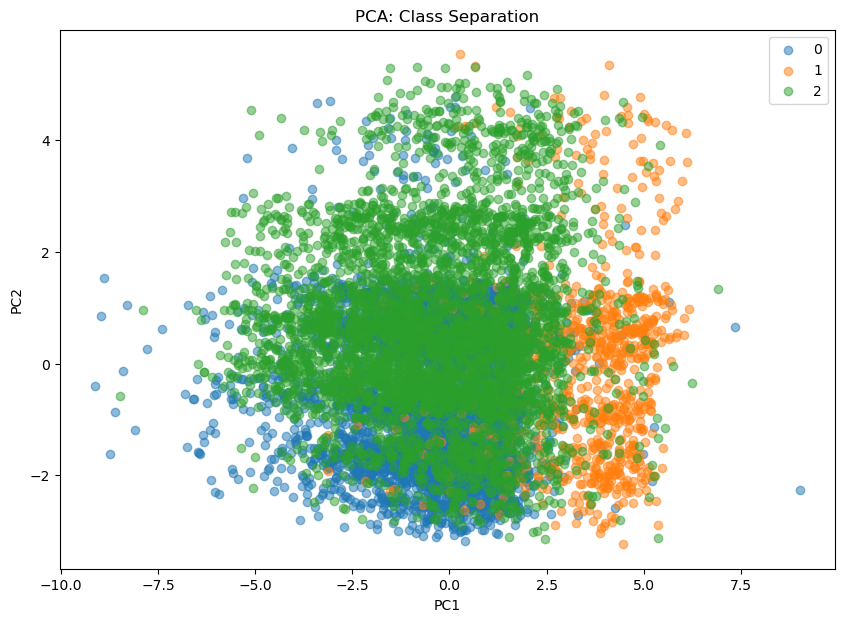

In [79]:
#PLC Visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10,7))
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=le.inverse_transform([label])[0], alpha=0.5)
plt.title("PCA: Class Separation")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

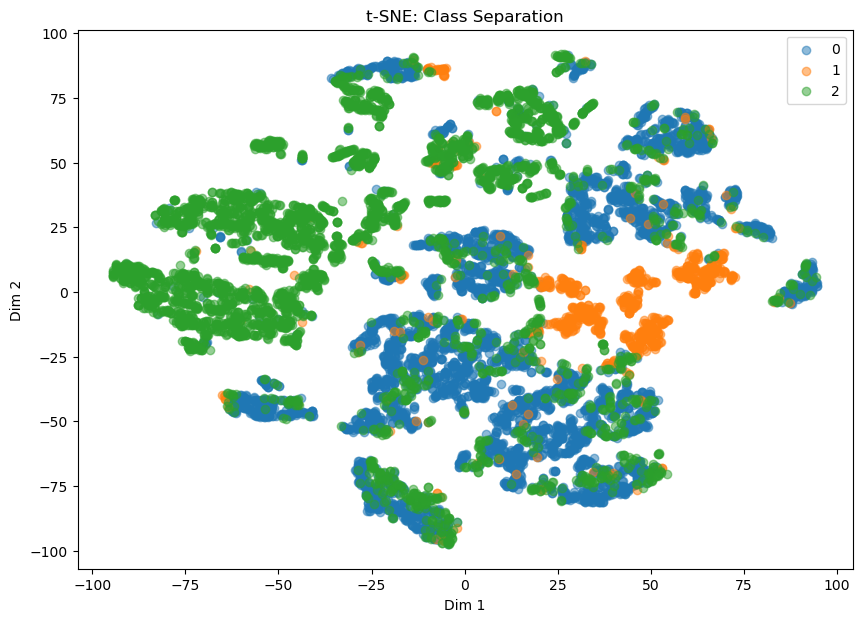

In [81]:
#t-SNE Visualization

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10,7))
for label in np.unique(y):
    plt.scatter(X_tsne[y == label, 0], X_tsne[y == label, 1], label=le.inverse_transform([label])[0], alpha=0.5)
plt.title("t-SNE: Class Separation")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.legend()
plt.show()

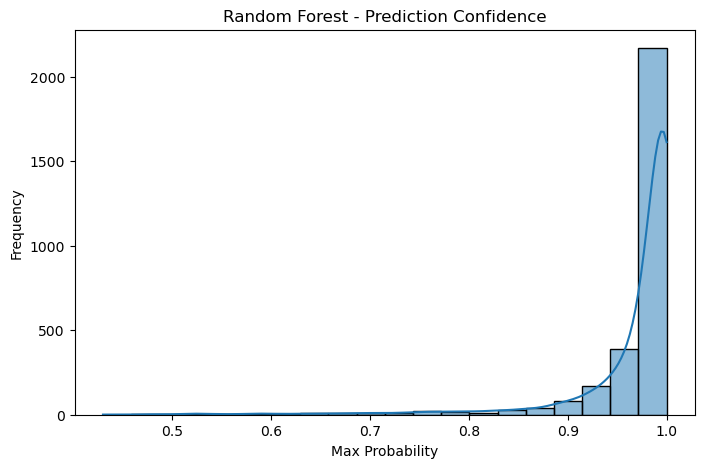

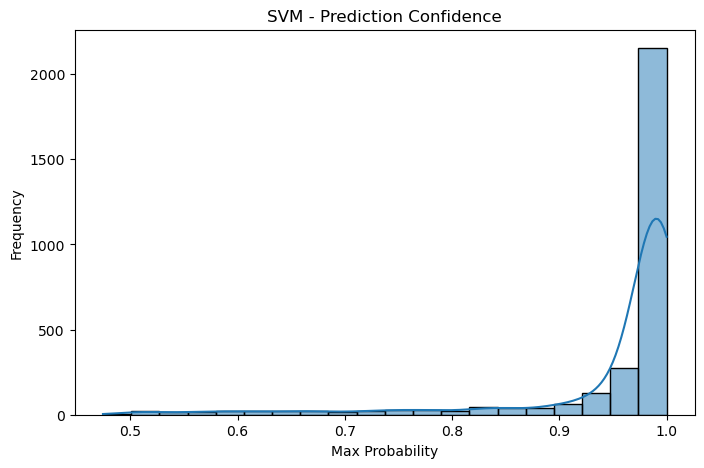

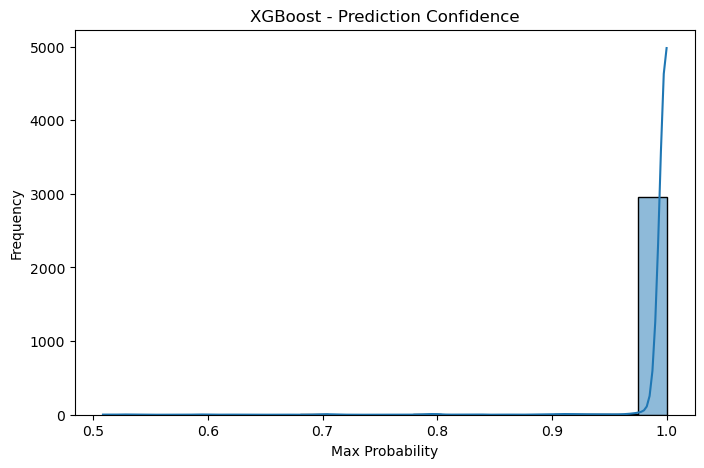

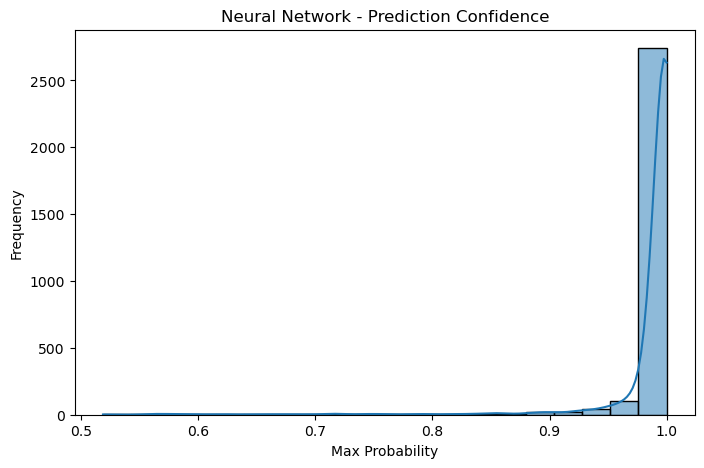

In [82]:
for name, model in all_models.items():
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_test)
        max_probs = probs.max(axis=1)
        
        plt.figure(figsize=(8,5))
        sns.histplot(max_probs, bins=20, kde=True)
        plt.title(f"{name} - Prediction Confidence")
        plt.xlabel("Max Probability")
        plt.ylabel("Frequency")
        plt.show()


In [83]:
sample_features = [sample_ra, sample_dec, sample_u, sample_g, sample_r, sample_i, sample_z, 
                    sample_redshift, sample_run, sample_rerun, sample_camcol, 
                    sample_field, sample_plate, sample_mjd, sample_fiberid]

sample_array = np.array(sample_features).reshape(1, -1)
sample_scaled = scaler.transform(sample_array)


In [84]:
for name, model in all_models.items():
    prediction = model.predict(sample_scaled)
    probas = model.predict_proba(sample_scaled)
    class_name = le.inverse_transform(prediction)[0]
    print(f"{name} predicts: {class_name} with probabilities: {probas}")


Random Forest predicts: 0 with probabilities: [[0.56 0.43 0.01]]
SVM predicts: 2 with probabilities: [[0.23698858 0.28907293 0.47393849]]
XGBoost predicts: 1 with probabilities: [[5.0479188e-03 9.9489093e-01 6.1169645e-05]]
Neural Network predicts: 1 with probabilities: [[0. 1. 0.]]


In [85]:
def classify_sample(model, scaler, le, sample_features):
    sample_array = np.array(sample_features).reshape(1, -1)
    sample_scaled = scaler.transform(sample_array)
    pred = model.predict(sample_scaled)
    proba = model.predict_proba(sample_scaled)
    return le.inverse_transform(pred)[0], proba

# Example usage:
for name, model in all_models.items():
    class_label, proba = classify_sample(model, scaler, le, sample_features)
    print(f"{name}: {class_label}, Probabilities: {proba}")


Random Forest: 0, Probabilities: [[0.56 0.43 0.01]]
SVM: 2, Probabilities: [[0.23698858 0.28907293 0.47393849]]
XGBoost: 1, Probabilities: [[5.0479188e-03 9.9489093e-01 6.1169645e-05]]
Neural Network: 1, Probabilities: [[0. 1. 0.]]


In [86]:
import pickle

pickle.dump(rf_model, open("rf_model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))
pickle.dump(le, open("label_encoder.pkl", "wb"))
